In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, MaxPooling2D, Activation
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.preprocessing import image
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop

In [2]:
os.name

'nt'

In [3]:
print(os.listdir("../digit-recognizer"))

['.ipynb_checkpoints', 'mnist digits.ipynb', 'sample_submission.csv', 'test.csv', 'train.csv']


In [4]:
train = pd.read_csv(r'C:\Users\DELL\Documents\My Learning\tensorflow guides\digit-recognizer\train.csv')


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
x_train = train.drop(['label'], axis=1)
y_train = train.label

In [8]:
# free some space
del train 

#### Normalization

Normalization is going to reduce the scale of the input values. The pixel value ranges from 0 to 255 which lay down grade of argentine. The CNN will meet further briskly on values 0 to 1 than 0 to 255. So we divide every value by 255 to gauge the data from(0.255) to(0.1). 

In [9]:
#grayscale normalization to reduce the effect of illumination's differences.

#Moreover the CNN converg faster on [0..1] data than on [0..255].

x_train = x_train/255.0

#### Reshape
The array of pixel values are reshaped into a (28,28,1) matrix. We are feeding the CNN model with input_shape of 28x28x1 matrix.

In [10]:
x_train = x_train.values.reshape(-1, 28, 28, 1)

In [11]:
x_train.shape

(42000, 28, 28, 1)

In [12]:
no_images=len(x_train)

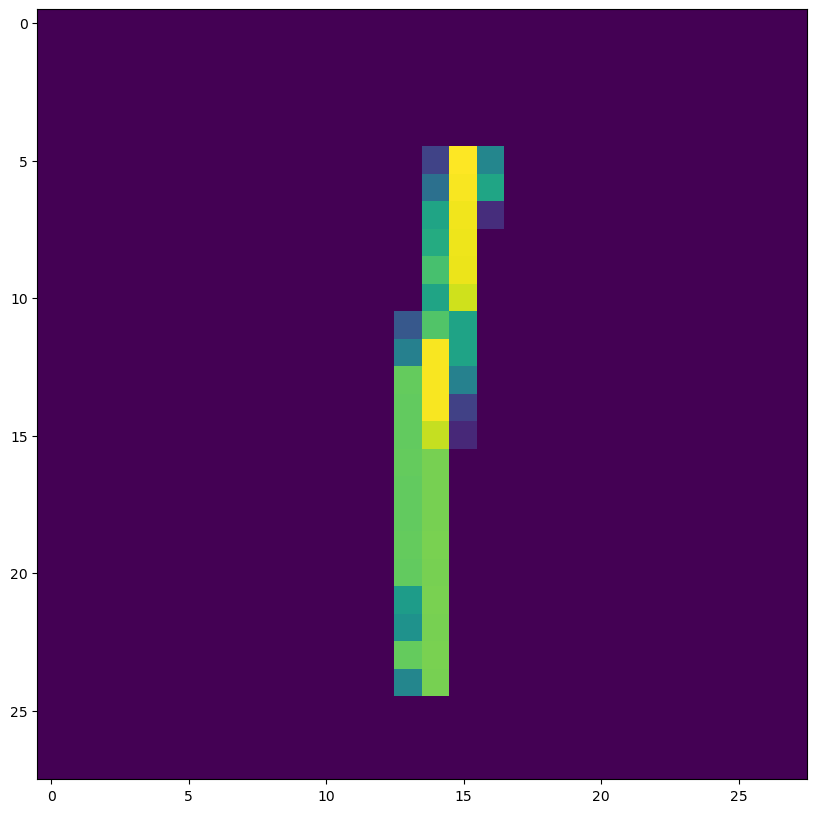

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
plt.imshow(x_train[random.randint(0, no_images), :, :, 0])
plt.show()

In [14]:
def sides(image):
    fig, im = plt.subplots(nrows=1, ncols=3, figsize=(30, 20))
    im[0].imshow(image)
    im[0].set_title('Original Image', fontsize=24)
    im[1].imshow(cv2.flip(image, 0))
    im[1].set_title('Vertical Flip', fontsize=24)
    im[2].imshow(cv2.flip(image, 1))
    im[2].set_title('Horizontal Flip', fontsize=24)
    plt.show()

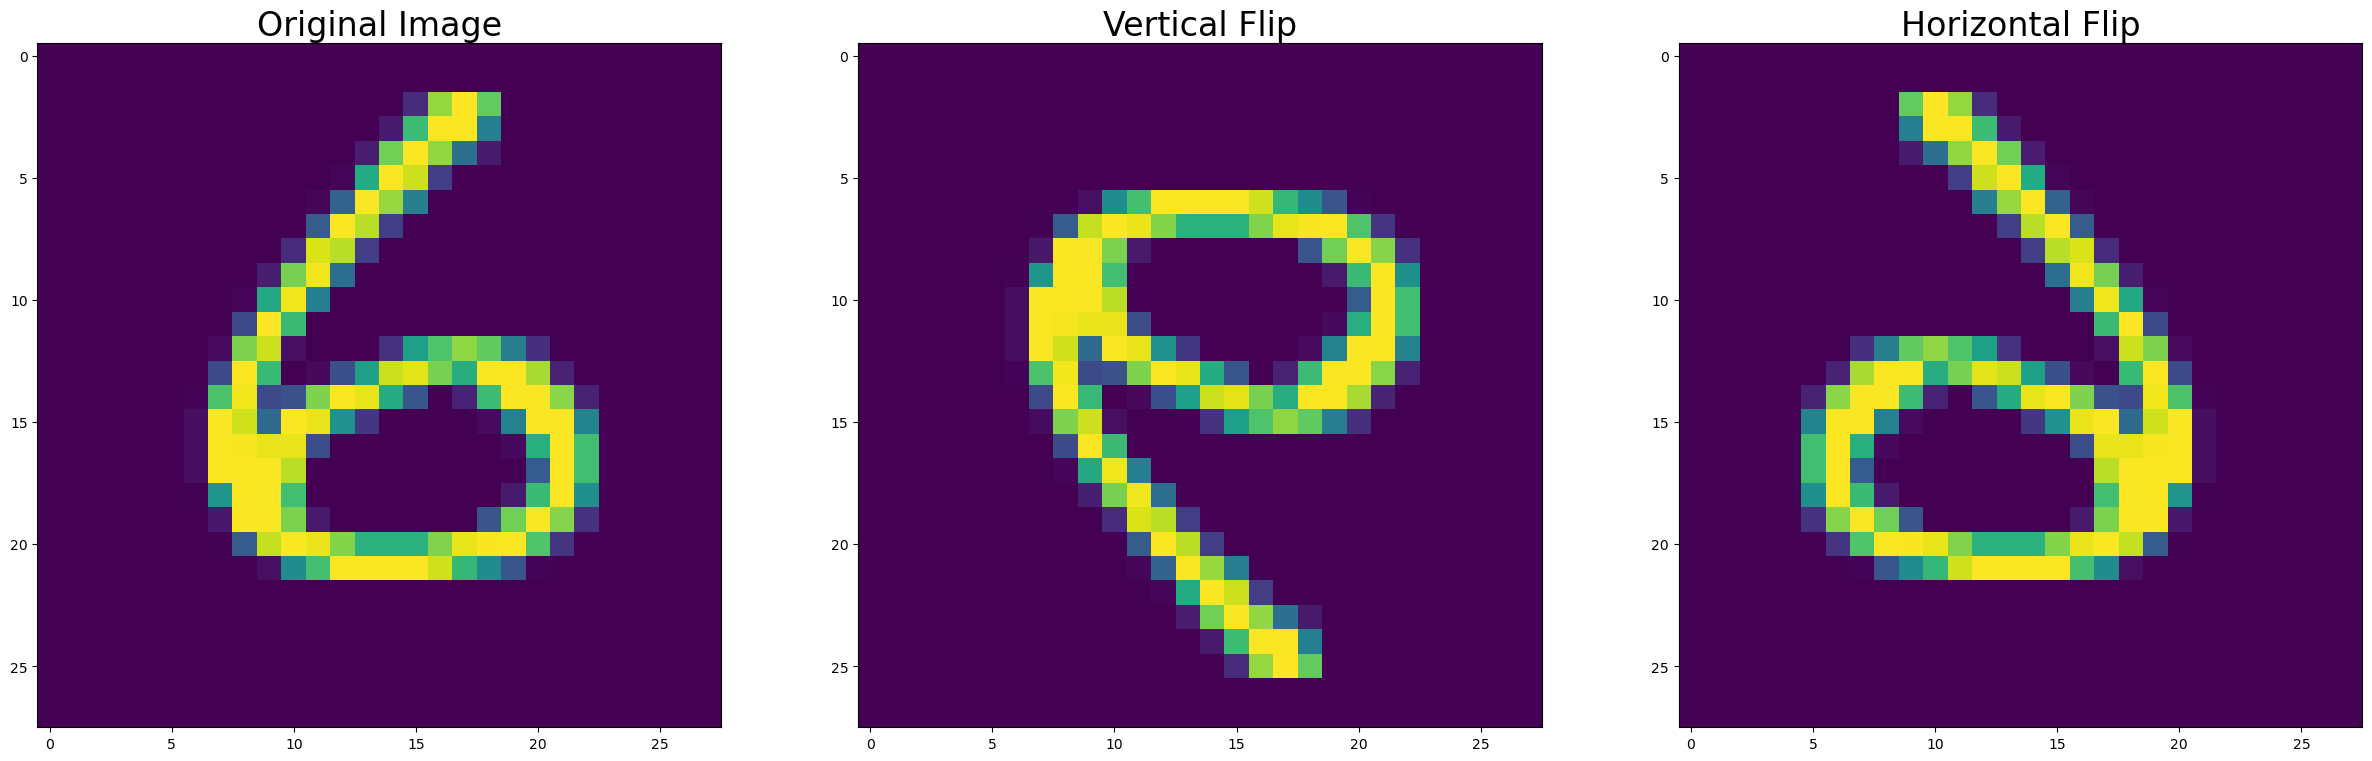

In [15]:
sides(x_train[random.randint(0,no_images), :, :, 0])

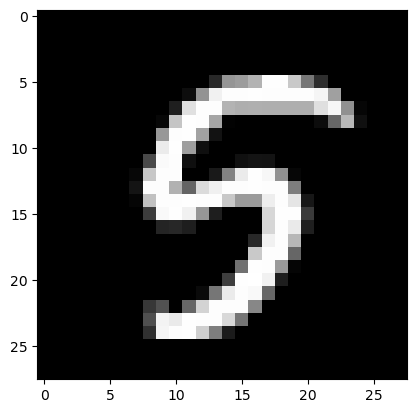

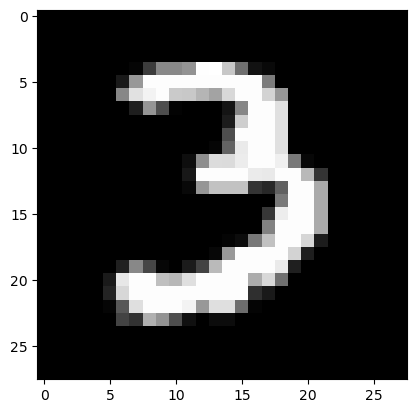

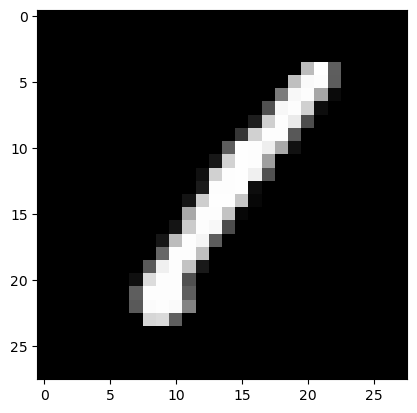

In [16]:
plt.imshow(x_train[8],cmap="gray")
plt.show()
plt.imshow(x_train[9],cmap="gray")
plt.show()
plt.imshow(x_train[0,:].reshape(28,28),cmap="gray")
plt.show()

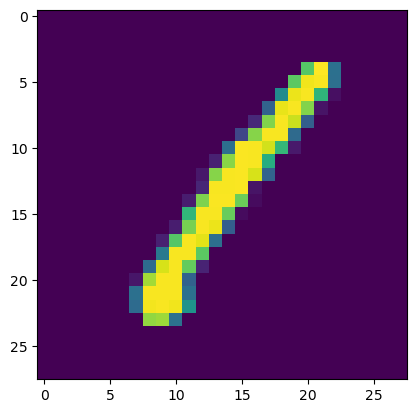

In [17]:
plt.imshow(x_train[0][:,:,0])

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [19]:
y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_val = keras.utils.to_categorical(y_val, num_classes = 10)

#### Layers (CNN)
Deep Convolutional Neural Network is a network of artificial neural networks. A model archiecture is the design of the neural networks with which we train the parameters in training process

In [20]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [21]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [22]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [24]:
training = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=5)

Epoch 1/5
1050/1050 [==============================] - 228s 216ms/step - loss: 0.2146 - accuracy: 0.9327 - val_loss: 0.0517 - val_accuracy: 0.9836
Epoch 2/5
1050/1050 [==============================] - 238s 227ms/step - loss: 0.0772 - accuracy: 0.9769 - val_loss: 0.0487 - val_accuracy: 0.9835
Epoch 3/5
1050/1050 [==============================] - 239s 227ms/step - loss: 0.0647 - accuracy: 0.9811 - val_loss: 0.0361 - val_accuracy: 0.9887
Epoch 4/5
1050/1050 [==============================] - 242s 231ms/step - loss: 0.0596 - accuracy: 0.9830 - val_loss: 0.0346 - val_accuracy: 0.9889
Epoch 5/5
1050/1050 [==============================] - 248s 236ms/step - loss: 0.0571 - accuracy: 0.9846 - val_loss: 0.0399 - val_accuracy: 0.9871


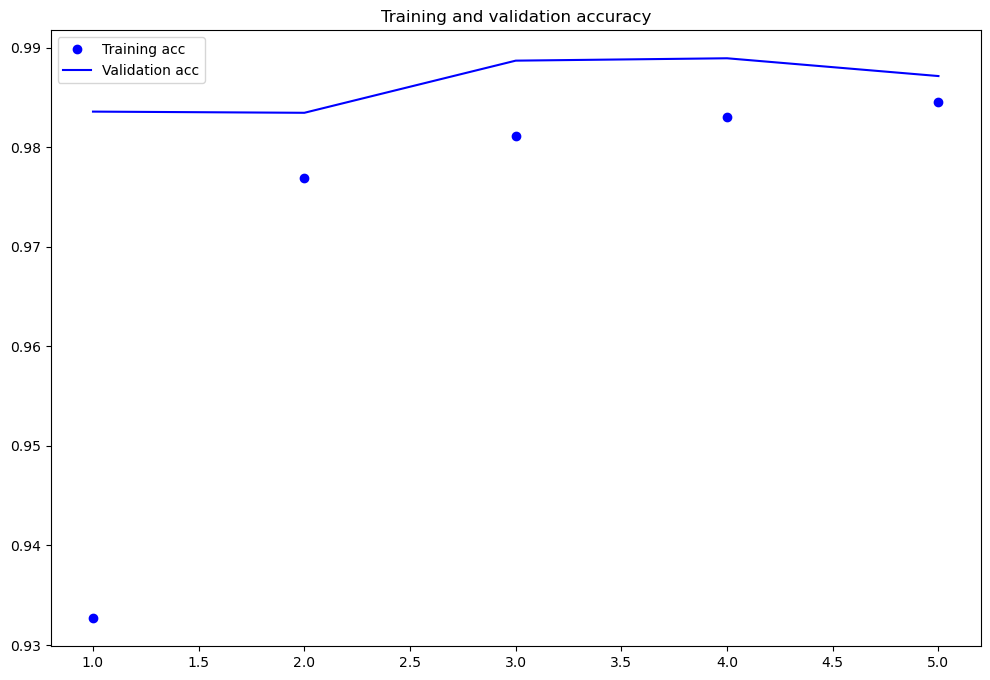

<Figure size 640x480 with 0 Axes>

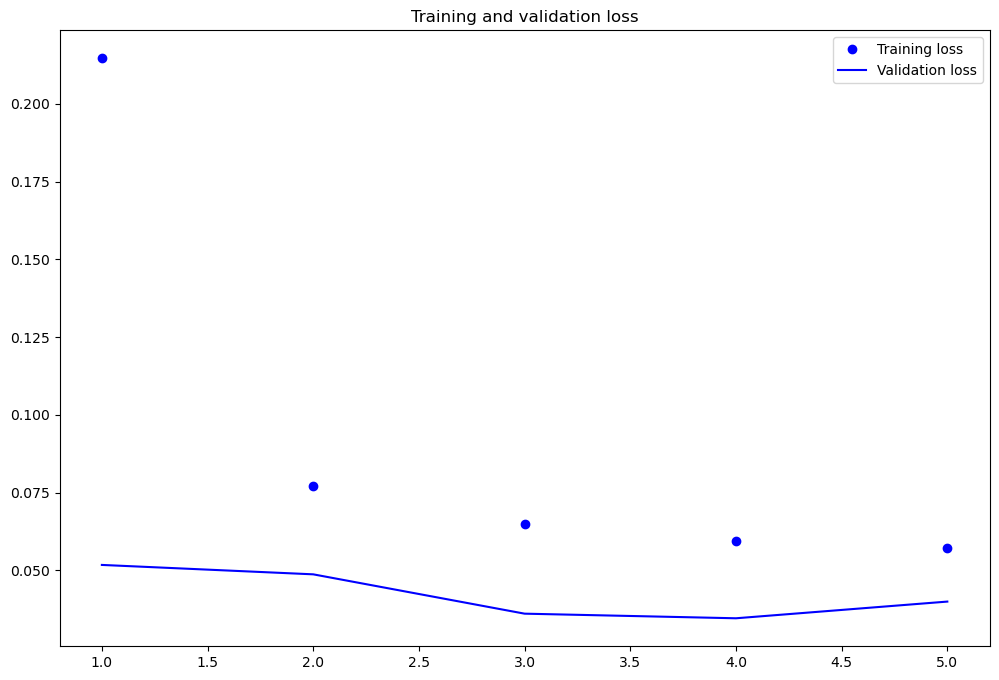

In [25]:
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']

loss = training.history['loss']
val_loss = training.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12,8))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")